**California Housing Price Prediction**

**1- Load the data :**

In [5]:
# Read the “housing.csv” file
import pandas as pd
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')

In [6]:
# Print first few rows of this data
print(Data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [7]:
# Extract input (X) and output (Y) data from the dataset

X = Data.iloc[:, :-1].values
Y = Data.iloc[:, [-1]].values

**2- Handle missing values :**

In [9]:
# Fill the missing values with the mean of the respective column
from sklearn.impute import SimpleImputer
import numpy as np
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, :-1] = Imputer.fit_transform(X[:, :-1])
Y = Imputer.fit_transform(Y)

**3- Encode categorical data :**

In [10]:
# Convert categorical column in the dataset to numerical data
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

**4- Split the dataset :**

In [12]:
# Split the data into 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**5- Standardize data :**

In [13]:
# Standardize training and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.transform(Y_test)

**6- Perform Linear Regression :**

In [14]:
# Perform Linear Regression on training data
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Predict output for test dataset using the fitted model
predictionLinear = linearRegression.predict(X_test)

In [18]:
#Print root mean squared error (RMSE) from Linear Regression [ HINT: Import mean_squared_error from sklearn.metrics ]
from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(Y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression = ', mseLinear)

Root mean squared error (RMSE) from Linear Regression =  0.3643080104280694


**7- Perform Decision Tree Regression :**

In [19]:
#Perform Decision Tree Regression on training data
from sklearn.tree import DecisionTreeRegressor
DecisionTreeR = DecisionTreeRegressor()
DecisionTreeR.fit(X_train, Y_train)

DecisionTreeRegressor()

In [20]:
#Predict output for test dataset using the fitted model
predictionDecisionTreeR = DecisionTreeR.predict(X_test)

In [21]:
#Print root mean squared error from Decision Tree Regression
mseDecisionTreeR = mean_squared_error(Y_test, predictionDecisionTreeR)
print('Root mean squared error from Decision Tree Regression = ', mseDecisionTreeR)

Root mean squared error from Decision Tree Regression =  0.34145607397162697


**8- Perform Random Forest Regression :**

In [22]:
# Perform Random Forest Regression on training data
from sklearn.ensemble import RandomForestRegressor
RandomForestR = RandomForestRegressor()
RandomForestR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor()

In [23]:
# Predict output for test dataset using the fitted model
predictionRandomForestR = RandomForestR.predict(X_test)

In [24]:
# Print RMSE (root mean squared error) from Random Forest Regression
mseRandomForestR = mean_squared_error(Y_test, predictionRandomForestR)
print('Root mean squared error from Random Forest Regression = ', mseRandomForestR)

Root mean squared error from Random Forest Regression =  0.17592214500111775


**9- Bonus exercise: Perform Linear Regression with one independent variable :**

In [25]:
# Extract just the median_income column from the independent variables (from X_train and X_test)
X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

In [26]:
# Perform Linear Regression to predict housing values based on median_income
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, Y_train)

LinearRegression()

In [27]:
# Predict output for test dataset using the fitted model
predictionLinear2 = linearRegression2.predict(X_test_median_income)

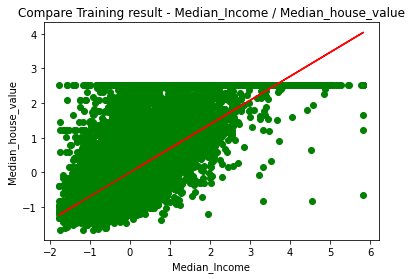

In [29]:
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data
import matplotlib.pyplot as plt

# Training set
plt.scatter(X_train_median_income, Y_train, color = 'green')
plt.plot (X_train_median_income, linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('Compare Training result - Median_Income / Median_house_value')
plt.xlabel('Median_Income')
plt.ylabel('Median_house_value')
plt.show()

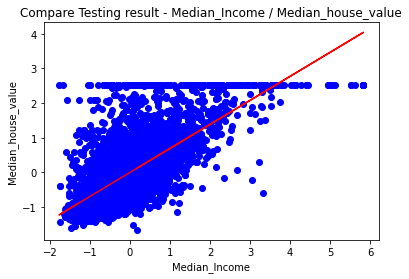

In [30]:
# Testing set
plt.scatter(X_test_median_income, Y_test, color = 'blue')
plt.plot (X_train_median_income, linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('Compare Testing result - Median_Income / Median_house_value')
plt.xlabel('Median_Income')
plt.ylabel('Median_house_value')
plt.show()